## CNN using Keras - Fashion MNIST Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [11]:
from tensorflow.keras.datasets import fashion_mnist


(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, " ",y_train.shape)
print(x_test.shape, " ",y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


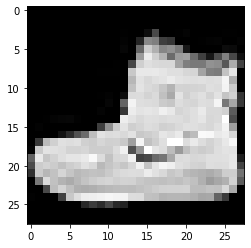

Image Label - 9


In [12]:
image = x_train[0]
plt.imshow(image, cmap="gray")
plt.show()

print("Image Label -",y_train[0])

### One hot Encoding

In [13]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

print("Label ",y_train[0])
print("One hot encoded ",y_cat_train[0])

Label  9
One hot encoded  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Normalizing Data

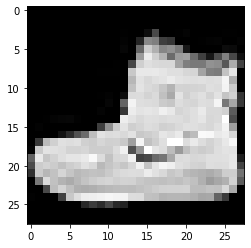

In [14]:
x_train = x_train/255
x_test = x_test/255

plt.imshow(x_train[0], cmap="gray")
plt.show()

### Reshaping

In [15]:
print("Before - ",x_train.shape)

# # dim = (batchsize, x(width), y(height), color_channels)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print("After - ",x_train.shape)

Before -  (60000, 28, 28)
After -  (60000, 28, 28, 1)


#   

## CNN Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

# Output softmax (multiclass classification)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=2,verbose=1)

In [19]:
model.fit(x=x_train, y=y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 683us/sample - loss: 0.4065 - accuracy: 0.8567 - val_loss: 0.3331 - val_accuracy: 0.8812
Epoch 2/10
60000/60000 [==============================] - 40s 667us/sample - loss: 0.2791 - accuracy: 0.8994 - val_loss: 0.3054 - val_accuracy: 0.8897
Epoch 3/10
60000/60000 [==============================] - 35s 584us/sample - loss: 0.2346 - accuracy: 0.9133 - val_loss: 0.3009 - val_accuracy: 0.8901
Epoch 4/10
60000/60000 [==============================] - 35s 584us/sample - loss: 0.2004 - accuracy: 0.9250 - val_loss: 0.2610 - val_accuracy: 0.9059
Epoch 5/10
60000/60000 [==============================] - 36s 596us/sample - loss: 0.1714 - accuracy: 0.9347 - val_loss: 0.2711 - val_accuracy: 0.9047
Epoch 6/10
60000/60000 [==============================] - 35s 586us/sample - loss: 0.1473 - accuracy: 0.9445 - val_loss: 0.2651 - val_accuracy: 0.9117
Epoch 00006: early stopping


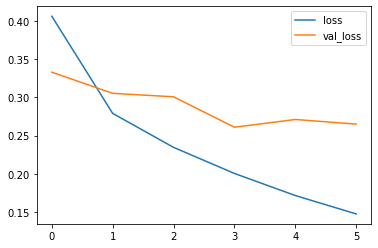

In [20]:
metrics = pd.DataFrame(model.history.history)
metrics[["loss","val_loss"]].plot()

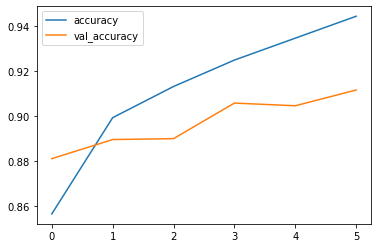

In [21]:
metrics[["accuracy","val_accuracy"]].plot()

### Evaluation

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
results = model.evaluate(x_test, y_cat_test)

print("Loss : ",results[0])
print("Accuracy : ",results[1]*100,"%")

10000/10000 [==============================] - 2s 201us/sample - loss: 0.2651 - accuracy: 0.9117
Loss :  0.265102731025219
Accuracy :  91.17000102996826 %


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.88      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.85      0.86      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.75      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



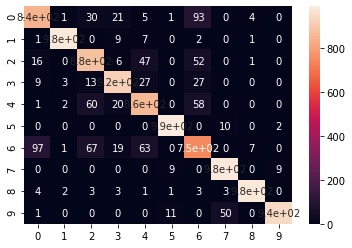

In [26]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, annot=True)
plt.show()

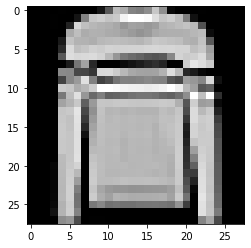

In [27]:
number = x_train[5].reshape(28,28)
plt.imshow(number,cmap="gray")
plt.show()

In [28]:
pre = model.predict_classes(number.reshape(1,28,28,1))
print("Prediction ",pre[0])

Prediction  2
